# 0 - Mise en place de l'environnement

## > Import des modules

In [1]:
import spacy  # Pour le traitement du langage naturel
spacy.cli.download("en_core_web_trf")
# Google Colab -> relancer la session après éxecution puis ignorer ce bloc

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
# 1. Traitement et analyse de données
import pandas as pd  # Manipulation de dataframes (tableaux de données)
import numpy as np   # Calculs numériques et manipulation de tableaux

# 2. Visualisation de données
import plotly.express as px   # Création de graphiques interactifs
import plotly.graph_objects as go  # Création de graphiques complexes et personnalisables
import matplotlib.pyplot as plt  # Création de graphiques classiques
import seaborn as sns  # Création de graphiques statistiques et esthétiques

# 3. Traitement du langage naturel (NLP)
from transformers import BertTokenizer, BertForSequenceClassification, BertModel  # Modèles de langage basés sur BERT
from transformers import AutoTokenizer, AutoModel  # Chargement automatique de modèles de langage
import spacy  # Bibliothèque de NLP pour le traitement de texte
import en_core_web_trf  # Modèle de langage Spacy pour l'anglais
import gensim.downloader as api  # Téléchargement de modèles pré-entraînés pour Gensim

# 4. Apprentissage automatique
## 4.1 Scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Extraction de caractéristiques textuelles
from sklearn.decomposition import LatentDirichletAllocation, NMF  # Modèles de réduction de dimensionnalité pour les textes
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, StratifiedKFold  # Sélection de modèles et validation croisée
from sklearn.svm import SVC  # Machine à vecteurs de support pour la classification
from sklearn.neighbors import KNeighborsClassifier  # Classifieur des k plus proches voisins
from sklearn.ensemble import GradientBoostingClassifier  # Algorithme de boosting de gradient pour la classification
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Prétraitement des données
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix  # Évaluation des modèles de classification
from sklearn.cluster import KMeans  # Algorithme de clustering K-means
from sklearn.metrics.cluster import adjusted_rand_score  # Évaluation des modèles de clustering

## 4.2 Deep Learning
import torch  # Framework de deep learning
import tensorflow_hub as hub  # Modèles pré-entraînés pour TensorFlow
from keras import Model  # Construction de modèles de réseaux de neurones
from keras.applications.vgg16 import VGG16, decode_predictions  # Modèle pré-entraîné VGG16 pour la classification d'images
from keras.layers import Dense  # Couche de neurones entièrement connectée
from keras.preprocessing.image import load_img, img_to_array  # Chargement et prétraitement d'images
from keras.applications.vgg16 import preprocess_input  # Prétraitement spécifique pour VGG16

# 5. Statistiques et probabilités
from scipy.stats import randint, uniform, chi2_contingency  # Fonctions statistiques

# 6. Traitement d'images
import cv2  # Bibliothèque OpenCV pour le traitement d'images

# 7. Réduction de dimensionnalité et clustering
import umap.umap_ as umap  # Algorithme UMAP pour la réduction de dimensionnalité
from sklearn.decomposition import PCA  # Analyse en composantes principales (PCA)
import hdbscan  # Clustering basé sur la densité avec HDBSCAN
from sklearn.mixture import GaussianMixture  # Modèles de mélange gaussien pour le clustering

# 8. Utilitaires
import random  # Génération de nombres aléatoires
from tqdm import tqdm  # Barres de progression
import os  # Interaction avec le système de fichiers
from typing import Union  # Définition de types pour les fonctions
from spacy.tokens import Doc  # Objet Doc de Spacy pour représenter un texte

# Chargement des modèles
nlp = spacy.load('en_core_web_trf')  # Chargement du modèle Spacy pour l'anglais
wv = api.load('glove-wiki-gigaword-50')  # Chargement du modèle Word2Vec pré-entraîné sur Wikipédia

#numba pour rendre le code GPU-compatible

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_venv\lib\site-packages\thinc\shims\pytorch.py:253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict

In [3]:
doc = nlp("This is a sentence. What's up ?")

[token.text for token in doc]

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_venv\lib\site-packages\thinc\shims\pytorch.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self._mixed_precision):


['This', 'is', 'a', 'sentence', '.', 'What', "'s", 'up', '?']

In [4]:
print([(w.text, w.pos_) for w in doc])

[('This', 'PRON'), ('is', 'AUX'), ('a', 'DET'), ('sentence', 'NOUN'), ('.', 'PUNCT'), ('What', 'PRON'), ("'s", 'AUX'), ('up', 'ADP'), ('?', 'PUNCT')]


In [5]:
[token.text for token in doc if not token.is_punct]

['This', 'is', 'a', 'sentence', 'What', "'s", 'up']

In [6]:
graine = 242

In [7]:
def case_when(*args):
    """
    Évalue plusieurs conditions et retourne des valeurs spécifiques pour chaque condition.

    Cette fonction mime le comportement de `CASE WHEN` en SQL et de `case_when` en dplyr (R).

    Parameters:
    *args: Une séquence de conditions et de valeurs.
           Les éléments d'index pair (0, 2, 4, ...) sont les conditions (expressions booléennes).
           Les éléments d'index impair (1, 3, 5, ...) sont les valeurs correspondantes à retourner si la condition est vraie.

    Returns:
    np.ndarray: Un tableau Numpy contenant les valeurs correspondantes aux conditions évaluées.
                Si aucune condition n'est vraie, retourne `pd.NA` par défaut.

    Raises:
    ValueError: Si le nombre d'arguments n'est pas pair.

    Example:
    >>> x = np.array([1, 2, 3, 4, 5])
    >>> result = case_when(
            x < 2, 'A',
            (x >= 2) & (x < 4), 'B',
            x >= 4, 'C'
        )
    >>> print(result)
    ['A' 'B' 'B' 'C' 'C']

    Example with DataFrame:
    >>> df = pd.DataFrame({'x': [1, 2, 3, 4, 5]})
    >>> df['category'] = case_when(
            df['x'] < 2, 'A',
            (df['x'] >= 2) & (df['x'] < 4), 'B',
            df['x'] >= 4, 'C'
        )
    >>> print(df)
       x category
    0  1        A
    1  2        B
    2  3        B
    3  4        C
    4  5        C
    """
    if len(args) % 2 != 0:
        raise ValueError("The number of arguments must be even (pairs of conditions and values).")

    condlist = [args[i] for i in range(0, len(args), 2)]
    choicelist = [args[i] for i in range(1, len(args), 2)]

    return np.select(condlist, choicelist, default=pd.NA)

## > Import des données

In [8]:
texte = pd.read_csv('./Data/flipkart_com-ecommerce_sample_1050.csv')
texte.sample(5, random_state = graine)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
79,320833ab08c9a94ef83520612899a85f,2016-05-22 16:29:40 +0000,http://www.flipkart.com/florence9-baby-cap-red...,florence9 baby cap red checks Cap,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",CAPEGW7UTGHRJBEW,800.0,399.0,320833ab08c9a94ef83520612899a85f.jpg,False,Key Features of florence9 baby cap red checks ...,No rating available,No rating available,florence9,"{""product_specification""=>[{""key""=>""Number of ..."
292,7c15895bbfd7da97c219be5b28150a06,2016-03-02 16:58:31 +0000,http://www.flipkart.com/toddla-baby-girl-s-gat...,Toddla Baby Girl's Gathered Dress,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",DREEG78PDRW4GCD8,999.0,399.0,7c15895bbfd7da97c219be5b28150a06.jpg,False,Key Features of Toddla Baby Girl's Gathered Dr...,No rating available,No rating available,Toddla,"{""product_specification""=>[{""value""=>""1 Frock""..."
974,b0229d4466ac60c7ba53c7ce9fabad7c,2016-06-14 18:49:44 +0000,http://www.flipkart.com/jaycoknit-mediterranea...,Jaycoknit Mediterranean Sea's Lucky Wooden Han...,"[""Home Decor & Festive Needs >> Religion & Dev...",SHIEJNH8TTK9QJPJ,1799.0,399.0,b0229d4466ac60c7ba53c7ce9fabad7c.jpg,False,Key Features of Jaycoknit Mediterranean Sea's ...,No rating available,No rating available,Jaycoknit,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
523,8d1abb3504a19ab41e7d8b8b1d5dd839,2016-01-07 05:50:25 +0000,http://www.flipkart.com/maxima-09321cmgy-gold-...,Maxima 09321CMGY Gold Analog Watch - For Men,"[""Watches >> Wrist Watches >> Maxima Wrist Wat...",WATDZ5HGZZCZXDNC,975.0,880.0,8d1abb3504a19ab41e7d8b8b1d5dd839.jpg,False,Maxima 09321CMGY Gold Analog Watch - For Men ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va..."


# A. Texte

## I - Tokenisation

In [9]:
# Créez un ensemble de stop words une seule fois
stop_words = set(nlp.Defaults.stop_words)

def tokenize_text(text: Union[str, Doc]) -> list[str]:
    """
    Cette fonction prend un texte ou un objet Doc spaCy en entrée et renvoie une liste de lemmes.
    Les lemmes sont les formes canoniques des mots, obtenues après traitement par Spacy.
    Les ponctuations et les stopwords sont supprimés.

    Parameters
    ----------
    text : Union[str, spacy.tokens.Doc]
        Le texte ou le document spaCy à tokenizer.

    Returns
    -------
    List[str]
        La liste de lemmes du texte en entrée.
    """
    if isinstance(text, str):
        doc = nlp(text)
    elif isinstance(text, Doc):
        doc = text
    else:
        raise TypeError("L'entrée doit être une chaîne de caractères ou un objet spacy.tokens.Doc")
    
    return [token.lemma_ for token in doc if not (token.is_punct or token.lemma_ in stop_words)]

def process_batch(texts: list[str]) -> list[list[str]]:
    docs = list(nlp.pipe(texts))  # Process texts in a batch
    return [tokenize_text(doc) for doc in tqdm(docs, desc="Processing texts")] 

def tokenize_corpus(dataframe: pd.DataFrame, colonne: str, batch_size: int = 1000) -> pd.DataFrame:
    """
    Cette fonction prend un DataFrame et le nom d'une colonne en entrée,
    et renvoie un nouveau DataFrame avec une colonne supplémentaire contenant les listes de lemmes.

    Parameters
    ----------
    dataframe : pd.DataFrame
        Le DataFrame à tokenizer.
    colonne : str
        Le nom de la colonne contenant les textes à tokenizer.
    batch_size : int, optional
        La taille des lots pour le traitement par lots (par défaut 1000).

    Returns
    -------
    pd.DataFrame
        Le DataFrame avec une colonne supplémentaire contenant les listes de lemmes.
        La nouvelle colonne a pour nom '{colonne} token'.
    """
    df = dataframe.copy()
    
    # Traitement par lots avec tqdm pour le suivi de progression
    tokens = []
    total_batches = (len(df) + batch_size - 1) // batch_size  # Calcul du nombre total de lots
    for i in tqdm(range(0, len(df), batch_size), total=total_batches, desc="Tokenizing batches"):
        batch = df[colonne].iloc[i:i+batch_size].tolist()
        tokens.extend(process_batch(batch))
    
    df[colonne+' token'] = tokens
    df[colonne+' token raw'] = df[colonne+' token'].apply(' '.join)
    
    return df

In [10]:
# Test de la fonction de tokenization sur un texte dummy. En particulier, présence de plusieurs variantes d'un même lemme ("like" et "liking")
tokenize_text("Hey, what's up ? I like pasta quite much actually, but I do prefer a nice bowl of rice ! Recently, I've taken a liking to surfing and playing basketball. I have two basketballs at home to play with my wife and kids. She took of last night with the children, they went to Paris.")

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_venv\lib\site-packages\thinc\shims\pytorch.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self._mixed_precision):


['hey',
 'I',
 'like',
 'pasta',
 'actually',
 'I',
 'prefer',
 'nice',
 'bowl',
 'rice',
 'recently',
 'I',
 'liking',
 'surfing',
 'play',
 'basketball',
 'I',
 'basketball',
 'home',
 'play',
 'wife',
 'kid',
 'night',
 'child',
 'Paris']

In [11]:
# Nombre de documents (descriptions) composants le corpus
len(texte)

1050

In [12]:
# Visualisation de quelque documents du corpus
i = 1
for text in texte['description'].sample(10, random_state=graine):
    print('Extrait n°'+str(i))
    print(text + '\n')
    i += 1

Extrait n°1
Key Features of florence9 baby cap red checks Cap red checks Cotton,Specifications of florence9 baby cap red checks Cap Cap Details Number of Contents in Sales Package Pack of 1 Fabric Cotton Type baby cap red checks General Details Occasion Casual Ideal For Baby Boy's, Baby Girl's Additional Details Style Code baby cap red checks

Extrait n°2
Key Features of Toddla Baby Girl's Gathered Dress Raglan printed dress with beautiful flower on waist. Lining 100% cotton. Toddla Gathered A-Line Cotton Floral Print Knee-LongDress For Baby Girls Material : Made up of  Cotton that make this dress very comfortable to wear all day long . The perfrect dress for little princess to carry her cuteness and style . wash Care : Normal Wash in Cold Water . Do Not Twist . Do not Tumble .Dry in Shade .,Toddla Baby Girl's Gathered Dress Price: Rs. 499 Raglan printed dress with beautiful flower on waist. Lining 100% cotton.,Specifications of Toddla Baby Girl's Gathered Dress In The Box 1 Frock Dime

In [13]:
# Tokenization du corpus
texte = tokenize_corpus(dataframe=texte, colonne='description')
# Temps d'exécution Google Colab ~12mn -> le temps de prendre un café

Tokenizing batches: 100%|██████████| 2/2 [11:45<00:00, 352.94s/it]


In [14]:
texte['description token'].sample(5, random_state=graine)

79     [key, feature, florence9, baby, cap, red, chec...
292    [key, feature, Toddla, Baby, Girl, gather, Dre...
974    [key, feature, Jaycoknit, Mediterranean, Sea, ...
3      [key, feature, SANTOSH, ROYAL, fashion, cotton...
523    [Maxima, 09321CMGY, Gold, Analog, watch,  , ma...
Name: description token, dtype: object

In [15]:
# Visualisation du corpus
texte.sample(2, random_state = graine)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,description token,description token raw
79,320833ab08c9a94ef83520612899a85f,2016-05-22 16:29:40 +0000,http://www.flipkart.com/florence9-baby-cap-red...,florence9 baby cap red checks Cap,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",CAPEGW7UTGHRJBEW,800.0,399.0,320833ab08c9a94ef83520612899a85f.jpg,False,Key Features of florence9 baby cap red checks ...,No rating available,No rating available,florence9,"{""product_specification""=>[{""key""=>""Number of ...","[key, feature, florence9, baby, cap, red, chec...",key feature florence9 baby cap red check cap r...
292,7c15895bbfd7da97c219be5b28150a06,2016-03-02 16:58:31 +0000,http://www.flipkart.com/toddla-baby-girl-s-gat...,Toddla Baby Girl's Gathered Dress,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",DREEG78PDRW4GCD8,999.0,399.0,7c15895bbfd7da97c219be5b28150a06.jpg,False,Key Features of Toddla Baby Girl's Gathered Dr...,No rating available,No rating available,Toddla,"{""product_specification""=>[{""value""=>""1 Frock""...","[key, feature, Toddla, Baby, Girl, gather, Dre...",key feature Toddla Baby Girl gather Dress Ragl...


### Bag of Word, TfIdf

In [16]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texte['description token raw'])
feature_names = vectorizer.get_feature_names_out()
bow_matrix = X.toarray()

In [17]:
bow_matrix.shape
# 1050 documents dans le corpus, vocabulaire de 5318 mots distincts

(1050, 5325)

In [18]:
# Matrice bow
bow_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
bow_matrix.mean()
# Très creuse

0.010218287502794545

In [20]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texte['description token raw'])
feature_names = vectorizer.get_feature_names_out()
tfidf_matrix = X.toarray()

In [21]:
tfidf_matrix.shape
# Renvoie le nombre de document + la taille du vocabulaire du corpus tokenisé

(1050, 5325)

In [22]:
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
tfidf_matrix.mean()
# Également très creuse

0.0008255073965462436

In [24]:
# Aplatir la liste de jetons pour créer une liste python contenant tous les documents
# Mis bout à bout
vocabulaire = [jeton for sous_liste in texte['description token'] for jeton in sous_liste]

# Vectoriser les jetons
vectoriseur = CountVectorizer()
sac_de_mots = vectoriseur.fit_transform(vocabulaire)
sac_de_mots

<60135x5325 sparse matrix of type '<class 'numpy.int64'>'
	with 57129 stored elements in Compressed Sparse Row format>

In [25]:
len(vocabulaire)

60135

In [26]:
def tracer_mots_les_plus_frequents(jetons_serie, n_mots_les_plus_frequents=10, desc=True):
    """
    Trace un graphique à barres des mots les plus fréquents dans une série de jetons.

    Paramètres
    ----------
    jetons_serie : pandas.Series
        Série de jetons (ou colonne de jetons dans un dataframe pandas).
    n_mots_les_plus_frequents : int, facultatif
        Nombre de mots les plus fréquents à tracer (par défaut : 10).

    Retours
    -------
    None

    Exemples
    --------
    >>> tracer_mots_les_plus_frequents(texte['description jeton'], n_mots_les_plus_frequents=10)
    """
    # Aplatir la liste de jetons
    vocabulaire = [jeton for sous_liste in jetons_serie for jeton in sous_liste]

    # Vectoriser les jetons
    vectoriseur = CountVectorizer()
    sac_de_mots = vectoriseur.fit_transform(vocabulaire)

    # Extraire les fréquences des mots
    freq_mots = sac_de_mots.sum(axis=0)

    # Trier les mots par fréquence
    vocabulaire_trie = sorted(vectoriseur.vocabulary_, key=lambda x: freq_mots[0, vectoriseur.vocabulary_[x]], reverse=desc)

    # Sélectionner les N mots les plus fréquents
    plus_frequents = vocabulaire_trie[:n_mots_les_plus_frequents]

    # Extraire les fréquences des N mots les plus fréquents
    freqs = [freq_mots[0, vectoriseur.vocabulary_[mot]] for mot in plus_frequents]

    # Tracer les mots les plus fréquents
    plt.figure(figsize=(10, 5))
    plt.bar(plus_frequents, freqs)
    plt.title('Top {} mots les plus fréquents'.format(n_mots_les_plus_frequents))
    plt.xlabel('Mots')
    plt.ylabel('Fréquence')
    plt.xticks(rotation=45)
    plt.show()

In [27]:
# Réduction taille de vocabulaire :
# Retirer mots très fréquents qui portent pas forcément bcp de sens et/ou ceux qui sont trop peu fréquents et font du bruit stat pour les modèles

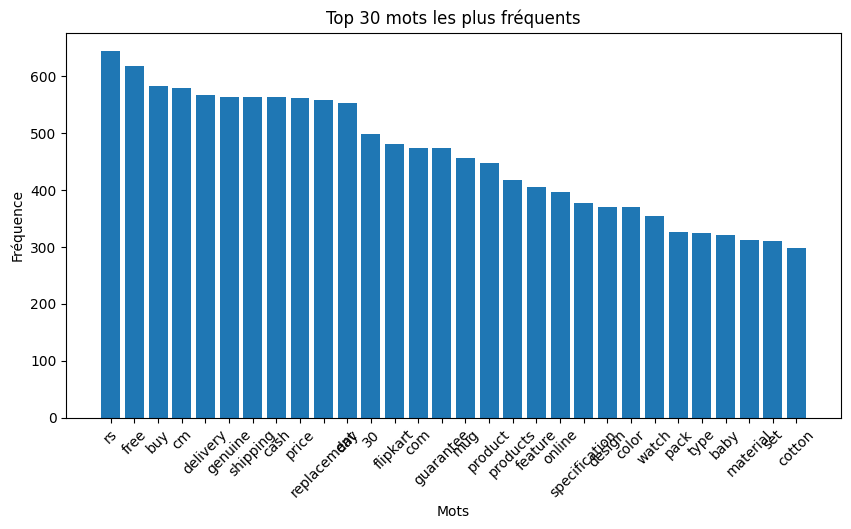

In [28]:
tracer_mots_les_plus_frequents(texte['description token'], 30,desc=True)

In [29]:
def tracer_mots_les_plus_importants_tfidf(jetons_serie, n_mots_les_plus_importants=10):
    """
    Trace un graphique à barres des mots les plus importants en utilisant TF-IDF dans une série de jetons.

    Paramètres
    ----------
    jetons_serie : pandas.Series
        Série de jetons (ou colonne de jetons dans un dataframe pandas).
    n_mots_les_plus_importants : int, facultatif
        Nombre de mots les plus importants à tracer (par défaut : 10).

    Retours
    -------
    None

    Exemples
    --------
    >>> tracer_mots_les_plus_importants_tfidf(texte['description jeton'], n_mots_les_plus_importants=10)
    """
    # Joindre les listes de jetons en une seule chaîne de caractères par document
    vocabulaire = [' '.join(jetons) for jetons in jetons_serie]

    # Vectoriser les jetons en utilisant TF-IDF
    vectoriseur = TfidfVectorizer()
    tfidf_matrix = vectoriseur.fit_transform(vocabulaire)

    # Extraire les scores TF-IDF moyens pour chaque terme
    tfidf_scores = tfidf_matrix.mean(axis=0).A1

    # Créer un DataFrame avec les termes et leurs scores TF-IDF
    termes = vectoriseur.get_feature_names_out()
    tfidf_df = pd.DataFrame({'terme': termes, 'tfidf': tfidf_scores})

    # Trier les termes par score TF-IDF
    tfidf_df = tfidf_df.sort_values(by='tfidf', ascending=False)

    # Sélectionner les N termes les plus importants
    top_termes = tfidf_df.head(n_mots_les_plus_importants)

    # Tracer les termes les plus importants
    plt.figure(figsize=(10, 5))
    plt.bar(top_termes['terme'], top_termes['tfidf'])
    plt.title('Top {} termes les plus importants (TF-IDF)'.format(n_mots_les_plus_importants))
    plt.xlabel('Termes')
    plt.ylabel('Score TF-IDF')
    plt.xticks(rotation=45)
    plt.show()

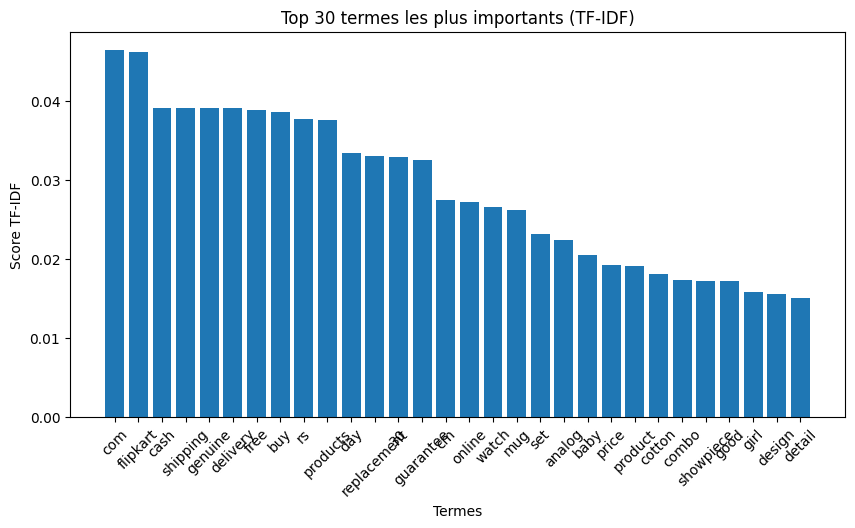

In [30]:
tracer_mots_les_plus_importants_tfidf(texte['description token'], n_mots_les_plus_importants=30)

In [31]:
# Distribution du nombre de token dans le corpus

(texte['description token'].apply(len)).describe()

count    1050.000000
mean       57.271429
std        50.147577
min        14.000000
25%        25.000000
50%        37.000000
75%        74.000000
max       355.000000
Name: description token, dtype: float64

### Nettoyage de token superflus

In [32]:
def delete_token_str(dataframe: pd.DataFrame, colonne: str, token: str):
    df = dataframe.copy()
    df[colonne] = df[colonne].str.replace(token, '', case=False, regex=True)
    return df

def delete_list_token_str(dataframe:pd.DataFrame, colonne:str, list_token:list):
  df = dataframe.copy()
  for token in list_token:
    df = delete_token_str(df, colonne, token)
  return df

def delete_token_vect(dataframe:pd.DataFrame, colonne:str, token:str):
  df = dataframe.copy()
  df[colonne] = df[colonne].apply(lambda x: [jeton for jeton in x if jeton.lower() != token.lower()])
  return df

def delete_list_token_vect(dataframe:pd.DataFrame, colonne:str, list_token:list):
  df = dataframe.copy()
  for token in list_token:
    df = delete_token_vect(df, colonne, token)
  return df

def delete_list_token(dataframe:pd.DataFrame, colonne:str, list_token:list):
  df = dataframe.copy()
  df = delete_list_token_str(df, colonne+' token raw', list_token)
  df = delete_list_token_vect(df, colonne+' token', list_token)
  return df

In [33]:
df_test = pd.DataFrame({
    'text': [
        'Hello, how are you today?',
        'I am doing well, thank you.',
        'This is an example.',
        'Add more lines.',
        'As many as you want.',
        'Oops, I made a mistake.',
        'This is another line.',
        'Oops, I did it again!',
        'More and more lines.',
        'Keep adding them.',
        'Oops, I cannot stop!',
        'Almost there.',
        'Just a few more.',
        'Oops, this is fun!',
        'Finally, fifteen lines.'
    ]
})

df_test = tokenize_corpus(df_test, 'text')
df_test

Tokenizing batches:   0%|          | 0/1 [00:00<?, ?it/s]c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_venv\lib\site-packages\thinc\shims\pytorch.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self._mixed_precision):
Tokenizing batches: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


,text,text token,text token raw
0,"Hello, how are you today?","[hello, today]",hello today
1,"I am doing well, thank you.","[I, thank]",I thank
2,This is an example.,[example],example
3,Add more lines.,"[add, line]",add line
4,As many as you want.,[want],want
5,"Oops, I made a mistake.","[oops, I, mistake]",oops I mistake
6,This is another line.,[line],line
7,"Oops, I did it again!","[oops, I]",oops I
8,More and more lines.,"[More, line]",More line
9,Keep adding them.,[add],add


In [34]:
delete_token_str(df_test, 'text', 'oops')

,text,text token,text token raw
0,"Hello, how are you today?","[hello, today]",hello today
1,"I am doing well, thank you.","[I, thank]",I thank
2,This is an example.,[example],example
3,Add more lines.,"[add, line]",add line
4,As many as you want.,[want],want
5,", I made a mistake.","[oops, I, mistake]",oops I mistake
6,This is another line.,[line],line
7,", I did it again!","[oops, I]",oops I
8,More and more lines.,"[More, line]",More line
9,Keep adding them.,[add],add


In [35]:
delete_token_vect(df_test, 'text token', 'Oops')

,text,text token,text token raw
0,"Hello, how are you today?","[hello, today]",hello today
1,"I am doing well, thank you.","[I, thank]",I thank
2,This is an example.,[example],example
3,Add more lines.,"[add, line]",add line
4,As many as you want.,[want],want
5,"Oops, I made a mistake.","[I, mistake]",oops I mistake
6,This is another line.,[line],line
7,"Oops, I did it again!",[I],oops I
8,More and more lines.,"[More, line]",More line
9,Keep adding them.,[add],add


In [36]:
delete_list_token_str(df_test, 'text', ['Oops', 'I'])

,text,text token,text token raw
0,"Hello, how are you today?","[hello, today]",hello today
1,"am dong well, thank you.","[I, thank]",I thank
2,Ths s an example.,[example],example
3,Add more lnes.,"[add, line]",add line
4,As many as you want.,[want],want
5,", made a mstake.","[oops, I, mistake]",oops I mistake
6,Ths s another lne.,[line],line
7,", dd t agan!","[oops, I]",oops I
8,More and more lnes.,"[More, line]",More line
9,Keep addng them.,[add],add


In [37]:
delete_list_token(df_test, 'text', ['Oops'])

,text,text token,text token raw
0,"Hello, how are you today?","[hello, today]",hello today
1,"I am doing well, thank you.","[I, thank]",I thank
2,This is an example.,[example],example
3,Add more lines.,"[add, line]",add line
4,As many as you want.,[want],want
5,"Oops, I made a mistake.","[I, mistake]",I mistake
6,This is another line.,[line],line
7,"Oops, I did it again!",[I],I
8,More and more lines.,"[More, line]",More line
9,Keep adding them.,[add],add


In [38]:
len(texte[texte['description token raw'].str.contains('key')])

206

In [39]:
texte.loc[texte['description token raw'].str.contains('key'),'description token raw'].sample(10, random_state=graine)

996    key feature L Oreal Eversleek sulfate free Smo...
998    key feature happiness print bone China mug spe...
901    key feature @home Earthy Wine Net Ceramic Vase...
975    key feature Jacadi paris Baby Boy Striped Casu...
904    key feature Relaxfeel Floral single dohar whit...
472    key feature giftsthatwow GTW G-06 pack 1 multi...
903    key feature BRANDWAGON DIGIPRINT Digital Repri...
644    key feature MKB Baby Girl Empire waist dress m...
994    key feature AM Creation Magic   Ceramic Mug pr...
974    key feature Jaycoknit Mediterranean Sea Lucky ...
Name: description token raw, dtype: object

In [40]:
len(texte[texte['description token raw'].str.contains('com')])

563

In [41]:
for text in texte.loc[texte['description token raw'].str.contains('com'),'description token'].sample(10, random_state=graine):
  print(text,'\n')

['Xemex', 'ST1025SL07', 'new', 'generation', 'analog', 'watch', ' ', 'woman', 'buy', 'Xemex', 'ST1025SL07', 'New', 'generation', 'analog', 'watch', ' ', 'woman', ' ', 'ST1025SL07', 'online', 'rs.275', 'India', 'flipkart.com', 'great', 'discount', 'genuine', 'product', '30', 'day', 'replacement', 'guarantee', 'free', 'shipping', 'cash', 'delivery'] 

['Flipkart.com', 'buy', 'Spinz', 'Combo', 'Set', 'online', 'rs', '354', 'Flipkart.com', 'Genuine', 'Products', '30', 'day', 'replacement', 'guarantee', 'free', 'shipping', 'cash', 'delivery'] 

['buy', 'Valtellina', 'Checkered', 'Double', 'Blanket', 'Brown', 'rs', '878', 'flipkart.com', 'Genuine', 'Products', 'free', 'shipping', 'cash', 'delivery'] 

['Ollington', 'St.', 'Collection', 'baby', 'reusable', 'diaper', 'insert', '\r\n                         ', 'price', 'rs', '599', '\r\n\t\t\t\t\r\n\t\t\t', 'form', 'fitting', 'reusable', 'Ollington', 'St.', 'diaper', 'insert', 'set', 'baby', '\r\n\r\n', 'feature', '\r\n', '-reusable', 'diaper',

#### Selection des banwords

In [42]:
corpus_ajuste = delete_list_token(texte, 'description', ['flipkart',
                                                         'com',
                                                         'flipkart.com',
                                                         'key',
                                                         'feature',
                                                         'buy',
                                                         'shipping',
                                                         'delivery',
                                                         'genuine',
                                                         '\r\n',
                                                         '\r\n\r\n',
                                                         '\t'])

In [43]:
corpus_ajuste

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,description token,description token raw
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[Elegance, Polyester, Multicolor, Abstract, Ey...",Elegance Polyester Multicolor Abstract Eyele...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...","[specification, Sathiyas, cotton, bath, towel,...",specification Sathiyas cotton bath towel 3 bat...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...","[Eurospa, Cotton, Terry, Face, Towel, Set, siz...",Eurospa Cotton Terry Face Towel Set size sma...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[SANTOSH, ROYAL, fashion, cotton, print, king,...",SANTOSH ROYAL fashion cotton print king size...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...","[Jaipur, print, cotton, Floral, King, sized, D...",Jaipur print cotton Floral King sized Double...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...","[Oren, Empower, Extra, large, self, adhesive, ...",Oren Empower Extra large self adhesive sticker...
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...

In [44]:
corpus_ajuste.loc[corpus_ajuste['description'].str.contains('flipkart'),'description']

735    Key Features of AntiqueShop ABKL_GRN_GRN_GRN S...
736    Key Features of AntiqueShop ABKL_PL_PNK_PNK So...
737    Key Features of AntiqueShop ABKL_PL_PL_PNK Sof...
994    Key Features of AM Creation Magic  Ceramic Mug...
Name: description, dtype: object

In [45]:
def delete_list_token_str(dataframe:pd.DataFrame, colonne:str, list_token:list):
  df = dataframe.copy()
  for token in list_token:
    df[colonne] = df[colonne].apply(lambda x: ' '.join([mot for mot in x.split() if mot.lower() not in token]))
  return df

# Liste de mots à supprimer
mots_a_supprimer = ['flipkart', 'com', 'flipkart.com', 'key', 'feature', 'buy', 'shipping', 'delivery', 'genuine', '\r\n', '\r\n\r\n', '\t']

# Supprimer les mots de la colonne 'description'
corpus_ajuste = delete_list_token_str(corpus_ajuste, 'description', mots_a_supprimer)

# Afficher le corpus ajusté
corpus_ajuste


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,description token,description token raw
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Features of Elegance Polyester Multicolor Abst...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[Elegance, Polyester, Multicolor, Abstract, Ey...",Elegance Polyester Multicolor Abstract Eyele...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...","[specification, Sathiyas, cotton, bath, towel,...",specification Sathiyas cotton bath towel 3 bat...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Features of Eurospa Cotton Terry Face Towel Se...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...","[Eurospa, Cotton, Terry, Face, Towel, Set, siz...",Eurospa Cotton Terry Face Towel Set size sma...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Features of SANTOSH ROYAL FASHION Cotton Print...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[SANTOSH, ROYAL, fashion, cotton, print, king,...",SANTOSH ROYAL fashion cotton print king size...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Features of Jaipur Print Cotton Floral King si...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...","[Jaipur, print, cotton, Floral, King, sized, D...",Jaipur print cotton Floral King sized Double...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...","[Oren, Empower, Extra, large, self, adhesive, ...",Oren Empower Extra large self adhesive sticker...
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...

In [46]:
corpus_ajuste.loc[corpus_ajuste['description'].str.contains('flipkart'),'description']

Series([], Name: description, dtype: object)

### Nouveau tfidf

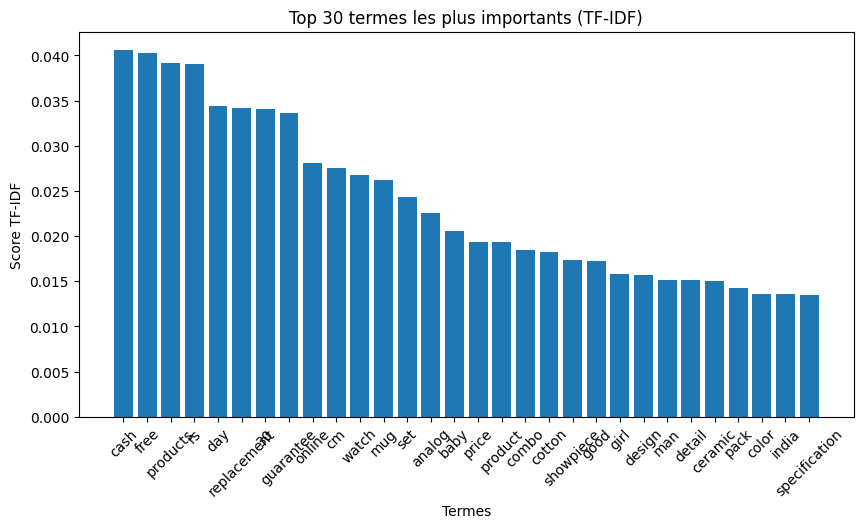

In [47]:
tracer_mots_les_plus_importants_tfidf(corpus_ajuste['description token'], n_mots_les_plus_importants=30)

In [48]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_ajuste['description token raw'])
feature_names = vectorizer.get_feature_names_out()
tfidf_matrix = X.toarray()

In [49]:
feature_names

array(['00', '000', '001', ..., 'zoom', 'zora', 'zyxel'], dtype=object)

## Classification

In [50]:
corpus_ajuste['simple_product_category_tree'] = corpus_ajuste['product_category_tree'].apply(lambda x: x.split(' >> ')[0] if isinstance(x, str) else x)
# Use a regular expression to replace '[' and '"' characters
corpus_ajuste['simple_product_category_tree'] = corpus_ajuste['simple_product_category_tree'].str.replace(r'[\["]', '', regex=True)


In [51]:
corpus_ajuste['simple_product_category_tree'].value_counts()

simple_product_category_tree
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64

In [52]:
corpus_ajuste['simple_product_category_tree'].nunique()

7

### LDA

In [53]:
# LDA pour la classification

n_cat = 7

lda = LatentDirichletAllocation(n_components=n_cat, random_state=graine)
lda.fit(tfidf_matrix)

LatentDirichletAllocation(n_components=7, random_state=242)

In [54]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx+1))
        print([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1] if i < len(feature_names)]) # Added a condition to check if the index is within the bounds of feature_names
        print(" ") # Added an empty print statement to add a space after each topic

no_top_words = 10
display_topics(lda, feature_names, no_top_words)

Topic 1:
['products', 'cash', 'free', 'towel', 'rs', 'blanket', 'originals', '1299', 'set', 'abstract']
 
Topic 2:
['cm', 'products', 'cash', 'free', 'rs', 'replacement', 'battery', 'cover', '30', 'guarantee']
 
Topic 3:
['watch', 'analog', 'man', 'discount', 'woman', 'great', 'india', 'online', '30', 'guarantee']
 
Topic 4:
['mug', 'products', 'cash', 'free', 'ceramic', 'rs', 'day', '30', 'guarantee', 'replacement']
 
Topic 5:
['usb', 'watch', 'guarantee', '30', 'cash', 'replacement', 'online', 'day', 'free', 'rs']
 
Topic 6:
['baby', 'girl', 'cotton', 'detail', 'fabric', 'boy', 'print', 'pack', 'dress', 'ideal']
 
Topic 7:
['ganesha', 'products', 'replacement', 'kadhai', 'guarantee', 'cash', '30', 'edimax', 'free', 'dungaree']
 


In [55]:
document_topics = lda.transform(tfidf_matrix)

corpus_ajuste['LDA_label'] = document_topics.argmax(axis=1)

corpus_ajuste

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,description token,description token raw,simple_product_category_tree,LDA_label
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Features of Elegance Polyester Multicolor Abst...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[Elegance, Polyester, Multicolor, Abstract, Ey...",Elegance Polyester Multicolor Abstract Eyele...,Home Furnishing,1
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...","[specification, Sathiyas, cotton, bath, towel,...",specification Sathiyas cotton bath towel 3 bat...,Baby Care,5
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Features of Eurospa Cotton Terry Face Towel Se...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...","[Eurospa, Cotton, Terry, Face, Towel, Set, siz...",Eurospa Cotton Terry Face Towel Set size sma...,Baby Care,5
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Features of SANTOSH ROYAL FASHION Cotton Print...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[SANTOSH, ROYAL, fashion, cotton, print, king,...",SANTOSH ROYAL fashion cotton print king size...,Home Furnishing,1
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Features of Jaipur Print Cotton Floral King si...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...","[Jaipur, print, cotton, Floral, King, sized, D...",Jaipur print cotton Floral King sized Double...,Home Furnishing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...","[Oren, Empower, Extra, large, self, adhesive, ...",Oren Empower Extra large self adhesive sticker...,Baby Care,0
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vi

In [56]:
adjusted_rand_score(corpus_ajuste['LDA_label'], corpus_ajuste['simple_product_category_tree'])

0.09766840283107821

In [57]:
 # gensim peut permettre d'enrichir les token par des ngrams pertinents
 # aussi regarder côté transformers huggingface

### NMF

In [58]:
#NMF

n_topics = 7 #Peut être essayer d'augmenter le nb de topics

nmf = NMF(n_components=n_topics, random_state=graine,l1_ratio=.5)
nmf.fit(tfidf_matrix)

NMF(l1_ratio=0.5, n_components=7, random_state=242)

In [59]:
display_topics(nmf, feature_names, no_top_words)

Topic 1:
['products', 'guarantee', '30', 'replacement', 'day', 'cash', 'free', 'bo', 'rs', 'set']
 
Topic 2:
['mug', 'coffee', 'ceramic', 'perfect', 'tea', 'printland', 'prithish', 'love', 'gift', 'bring']
 
Topic 3:
['baby', 'detail', 'girl', 'fabric', 'cotton', 'dress', 'sleeve', 'boy', 'neck', 'shirt']
 
Topic 4:
['watch', 'analog', 'man', 'discount', 'india', 'woman', 'great', 'product', 'dial', 'strap']
 
Topic 5:
['rockmantra', 'ceramic', 'mug', 'crafting', 'permanent', 'thrilling', 'porcelain', 'too', 'stay', 'start']
 
Topic 6:
['cm', 'showpiece', 'inch', 'cover', 'laptop', 'design', 'warranty', 'pack', 'skin', 'model']
 
Topic 7:
['abstract', 'blanket', 'products', 'single', 'double', 'cash', 'free', 'rs', 'forters', 'quilts']
 


In [60]:
document_topics = nmf.transform(tfidf_matrix)

corpus_ajuste['NMF_label'] = document_topics.argmax(axis=1)

corpus_ajuste

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,description token,description token raw,simple_product_category_tree,LDA_label,NMF_label
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Features of Elegance Polyester Multicolor Abst...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[Elegance, Polyester, Multicolor, Abstract, Ey...",Elegance Polyester Multicolor Abstract Eyele...,Home Furnishing,1,5
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...","[specification, Sathiyas, cotton, bath, towel,...",specification Sathiyas cotton bath towel 3 bat...,Baby Care,5,5
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Features of Eurospa Cotton Terry Face Towel Se...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...","[Eurospa, Cotton, Terry, Face, Towel, Set, siz...",Eurospa Cotton Terry Face Towel Set size sma...,Baby Care,5,5
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Features of SANTOSH ROYAL FASHION Cotton Print...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[SANTOSH, ROYAL, fashion, cotton, print, king,...",SANTOSH ROYAL fashion cotton print king size...,Home Furnishing,1,5
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Features of Jaipur Print Cotton Floral King si...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...","[Jaipur, print, cotton, Floral, King, sized, D...",Jaipur print cotton Floral King sized Double...,Home Furnishing,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...","[Oren, Empower, Extra, large, self, adhesive, ...",Oren Empower Extra large self adhesive sticker...,Baby Care,0,5
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg

In [61]:
adjusted_rand_score(corpus_ajuste['NMF_label'], corpus_ajuste['simple_product_category_tree'])

0.35006255665190367

In [62]:
# Construire la table de contingence
contingency_table = pd.crosstab(corpus_ajuste['NMF_label'], corpus_ajuste['simple_product_category_tree'])

# Effectuer le test du chi2
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats
print("Chi2 statistique: ", chi2)
print("p-value: ", p)
print("Degrés de liberté: ", dof)
#print("Tableau des fréquences attendues: \n", expected)

# Interpréter les résultats
alpha = 0.05
if p < alpha:
    print(f"On rejette l'hypothèse nulle d'indépendance entre le label et la catégorie de produit à un risque {round(100*alpha)} %.")
else:
    print("On ne peut pas rejeter l'hypothèse nulle d'indépendance entre le label et la catégorie de produit.")


Chi2 statistique:  2767.0577095751596
p-value:  0.0
Degrés de liberté:  36
On rejette l'hypothèse nulle d'indépendance entre le label et la catégorie de produit à un risque 5 %.


In [63]:
crosstab = pd.crosstab(corpus_ajuste['NMF_label'], corpus_ajuste['simple_product_category_tree'])
crosstab

simple_product_category_tree,Baby Care,Beauty and Personal Care,Computers,Home Decor & Festive Needs,Home Furnishing,Kitchen & Dining,Watches
NMF_label,,,,,,,
0,16,108,93,11,0,32,0
1,2,0,0,0,0,52,0
2,92,2,0,0,3,0,0
3,1,1,0,0,0,1,149
4,0,0,0,0,0,22,0
5,21,39,57,137,59,42,1
6,18,0,0,2,88,1,0


In [64]:
crosstab['total'] = crosstab.sum(axis=1) # Calculates the sum of each row and adds it as a new column named 'total'
crosstab

simple_product_category_tree,Baby Care,Beauty and Personal Care,Computers,Home Decor & Festive Needs,Home Furnishing,Kitchen & Dining,Watches,total
NMF_label,,,,,,,,
0,16,108,93,11,0,32,0,260
1,2,0,0,0,0,52,0,54
2,92,2,0,0,3,0,0,97
3,1,1,0,0,0,1,149,152
4,0,0,0,0,0,22,0,22
5,21,39,57,137,59,42,1,356
6,18,0,0,2,88,1,0,109


In [65]:
corpus_ajuste['product_category_tree'].value_counts()

product_category_tree
["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]                         56
["Kitchen & Dining >> Coffee Mugs >> Prithish Coffee Mugs"]                           26
["Watches >> Wrist Watches >> Maxima Wrist Watches"]                                  23
["Kitchen & Dining >> Coffee Mugs >> Rockmantra Coffee Mugs"]                         22
["Home Furnishing >> Bath Linen >> Towels"]                                           19
                                                                                      ..
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Infinity India Ethnic"]        1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Ravishing Variety Ethnic"]     1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Pg handicrafts Ethnic"]        1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Homedesires Ethnic"]           1
["Watches >> Wrist Watches >> Petrol Wrist Watches"]                                   1

## II - Embedding

### Définitions des méthodes d'embedding de documents

In [66]:
def create_gloVe_embeddings(dataframe: pd.DataFrame, colonne: str, model) -> pd.DataFrame:
    """
    Crée une colonne supplémentaire contenant des embeddings gloVe pour chaque document dans un DataFrame.

    Args:
        dataframe: Le DataFrame contenant les documents.
        colonne: Le nom de la colonne contenant les listes de tokens.
        model: Le modèle gloVe pré-entraîné.

    Returns:
        Le DataFrame avec une nouvelle colonne contenant les embeddings gloVe.
    """

    df = dataframe.copy()
    embeddings = []
    for liste_tokens in df[colonne]: #On parcout la colonne de token, ligne par ligne
        document_embedding = np.zeros(model.vector_size)  #Initialisation du vecteur d'embedding
        for token in liste_tokens: #A chaque nouvelle ligne, on regarde les token individuellement
            if token in model: #Si le modèle a déjà rencontré le token, on l'ajoute à l'embedding
                document_embedding += model[token]
        embeddings.append(document_embedding)
    df['gloVe_embeddings'] = embeddings #On obtient notre colonne d'embedding : un vecteur qui résume le document
    return df

def create_BERT_embeddings(dataframe: pd.DataFrame, colonne_texte: str, nom_modele='bert-base-cased', utiliser_gpu=True) -> pd.DataFrame:
    """
    Crée deux colonnes supplémentaires contenant des embeddings BERT pour chaque document dans un DataFrame :
    - 'bert_embeddings_cls' : Embeddings du token [CLS].

    Args:
        dataframe: Le DataFrame contenant les documents.
        colonne_texte: Le nom de la colonne contenant les textes à encoder.
        nom_modele: Le nom du modèle BERT pré-entraîné à utiliser (par défaut : 'bert-base-cased').
        utiliser_gpu: Booléen indiquant si le calcul doit être effectué sur GPU (si disponible).

    Returns:
        Le DataFrame avec deux nouvelles colonnes contenant les embeddings BERT.
    """

    df_copie = dataframe.copy()
    tokenizer = AutoTokenizer.from_pretrained(nom_modele)
    modele = AutoModel.from_pretrained(nom_modele)

    if utiliser_gpu and torch.cuda.is_available():
        device = torch.device('cuda')
        modele.to(device)
    else:
        device = torch.device('cpu')

    liste_embeddings_cls = []

    for texte in df_copie[colonne_texte]:
        inputs = tokenizer(texte, return_tensors="pt", padding=True, truncation=True)
        # Padding pour atteindre la longueur attendue par le modele, truncation quand c'est trop long
        inputs.to(device)
        with torch.no_grad():
          outputs = modele(**inputs)

        # Extraction de l'embedding du token [CLS]
        embedding_cls = outputs.last_hidden_state[:, 0, :].cpu().squeeze().numpy()
        embedding_cls_normalise = embedding_cls / np.linalg.norm(embedding_cls)
        liste_embeddings_cls.append(embedding_cls_normalise)

    df_copie['bert_embeddings_cls'] = liste_embeddings_cls

    return df_copie

modele_use = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def create_USE_embeddings(dataframe: pd.DataFrame, colonne: str, model = modele_use) -> pd.DataFrame:
    """
    Crée une colonne supplémentaire contenant des embeddings USE (Universal Sentence Encoder)
    pour chaque document dans un DataFrame.

    Args:
        dataframe: Le DataFrame contenant les documents.
        colonne: Le nom de la colonne contenant les textes à encoder.

    Returns:
        Le DataFrame avec une nouvelle colonne contenant les embeddings USE.
    """

    df = dataframe.copy()

    # Générer les embeddings
    embeddings = model(df[colonne]).numpy()

    # Ajouter les embeddings au DataFrame
    df['use_embeddings'] = list(embeddings)

    return df

### gloVe

In [67]:
corpus_gloVe = create_gloVe_embeddings(corpus_ajuste, 'description token', model=wv)

In [68]:
corpus_gloVe.sample(2, random_state = graine)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,description token,description token raw,simple_product_category_tree,LDA_label,NMF_label,gloVe_embeddings
79,320833ab08c9a94ef83520612899a85f,2016-05-22 16:29:40 +0000,http://www.flipkart.com/florence9-baby-cap-red...,florence9 baby cap red checks Cap,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",CAPEGW7UTGHRJBEW,800.0,399.0,320833ab08c9a94ef83520612899a85f.jpg,False,...,No rating available,No rating available,florence9,"{""product_specification""=>[{""key""=>""Number of ...","[florence9, baby, cap, red, check, cap, red, c...",florence9 baby cap red check cap red check C...,Baby Care,5,2,"[1.4642669036984444, 11.945569179952145, -2.46..."
292,7c15895bbfd7da97c219be5b28150a06,2016-03-02 16:58:31 +0000,http://www.flipkart.com/toddla-baby-girl-s-gat...,Toddla Baby Girl's Gathered Dress,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",DREEG78PDRW4GCD8,999.0,399.0,7c15895bbfd7da97c219be5b28150a06.jpg,False,...,No rating available,No rating available,Toddla,"{""product_specification""=>[{""value""=>""1 Frock""...","[Toddla, Baby, Girl, gather, Dress, Raglan, pr...",Toddla Baby Girl gather Dress Raglan print d...,Baby Care,5,2,"[-7.10961798299104, 28.881084993481636, -22.71..."


In [69]:
corpus_gloVe['gloVe_embeddings'].sample(3, random_state=graine)

79     [1.4642669036984444, 11.945569179952145, -2.46...
292    [-7.10961798299104, 28.881084993481636, -22.71...
974    [-0.5735432328656316, 37.92372989654541, 12.14...
Name: gloVe_embeddings, dtype: object

In [70]:
# Réduire la dimensionnalité des embeddings avec UMAP
reducer = umap.UMAP(n_neighbors=80, min_dist=0.4, metric='cosine', random_state=graine)
embedding_2d = reducer.fit_transform(list(corpus_gloVe['gloVe_embeddings']))

# Ajouter les embeddings 2D au DataFrame
corpus_gloVe['umap_embedding_x'] = embedding_2d[:, 0]
corpus_gloVe['umap_embedding_y'] = embedding_2d[:, 1]
# Ajouter une 3e dimension
# MatPlotLib3d pour faire des viz en 3D


# Visualiser les embeddings 2D avec Plotly
fig = px.scatter(corpus_gloVe, x='umap_embedding_x', y='umap_embedding_y',
                 color='simple_product_category_tree', hover_data=['NMF_label'],
                 title='UMAP Visualization of gloVe Embeddings')
fig.show()


c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_venv\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [71]:
# Kmeans + ARI pour comparer

In [72]:
reducer = umap.UMAP(n_neighbors=80,
                    n_components=3, # 3 dimensions au lieu de 2
                    min_dist=0.4,
                    metric='cosine',
                    random_state=graine)
embedding_3d = reducer.fit_transform(list(corpus_gloVe['gloVe_embeddings']))

corpus_gloVe['umap_embedding_x'] = embedding_3d[:, 0]
corpus_gloVe['umap_embedding_y'] = embedding_3d[:, 1]
corpus_gloVe['umap_embedding_z'] = embedding_3d[:, 2]

fig = px.scatter_3d(corpus_gloVe,
                    x='umap_embedding_x',
                    y='umap_embedding_y',
                    z='umap_embedding_z',
                    color='simple_product_category_tree',
                    hover_data=['NMF_label'],
                    title='UMAP 3D Visualization of gloVe Embeddings')
fig.show()

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_venv\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [73]:
# Prendre toutes les dimensions (donc pas après umap)

kmeans = KMeans(n_clusters=7, random_state=graine, n_init='auto').fit(corpus_gloVe.loc[:,['umap_embedding_x','umap_embedding_y','umap_embedding_z']])
corpus_gloVe['classif_non_supervisee'] = kmeans.labels_

adjusted_rand_score(corpus_gloVe['simple_product_category_tree'], corpus_gloVe['classif_non_supervisee'])

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_venv\lib\site-packages\threadpoolctl.py:1214: RuntimeWarning:


Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md




0.27553451091562436

### USE

In [74]:
corpus_USE = create_USE_embeddings(corpus_ajuste, 'description')

In [75]:
corpus_USE.sample(2, random_state = graine)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,description token,description token raw,simple_product_category_tree,LDA_label,NMF_label,use_embeddings
79,320833ab08c9a94ef83520612899a85f,2016-05-22 16:29:40 +0000,http://www.flipkart.com/florence9-baby-cap-red...,florence9 baby cap red checks Cap,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",CAPEGW7UTGHRJBEW,800.0,399.0,320833ab08c9a94ef83520612899a85f.jpg,False,...,No rating available,No rating available,florence9,"{""product_specification""=>[{""key""=>""Number of ...","[florence9, baby, cap, red, check, cap, red, c...",florence9 baby cap red check cap red check C...,Baby Care,5,2,"[-0.049170285, -0.057235226, -0.05199625, -0.0..."
292,7c15895bbfd7da97c219be5b28150a06,2016-03-02 16:58:31 +0000,http://www.flipkart.com/toddla-baby-girl-s-gat...,Toddla Baby Girl's Gathered Dress,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",DREEG78PDRW4GCD8,999.0,399.0,7c15895bbfd7da97c219be5b28150a06.jpg,False,...,No rating available,No rating available,Toddla,"{""product_specification""=>[{""value""=>""1 Frock""...","[Toddla, Baby, Girl, gather, Dress, Raglan, pr...",Toddla Baby Girl gather Dress Raglan print d...,Baby Care,5,2,"[-0.05914197, -0.049057882, -0.03621442, 0.028..."


In [76]:
for embeddings in corpus_USE['use_embeddings'].sample(10, random_state=graine):
  print(len(embeddings))

512
512
512
512
512
512
512
512
512
512


In [77]:
# Réduire la dimensionnalité des embeddings avec UMAP
reducer = umap.UMAP(n_neighbors=80, min_dist=0.6, metric='cosine', random_state=graine)
embedding_2d = reducer.fit_transform(list(corpus_USE['use_embeddings']))

# Ajouter les embeddings 2D au DataFrame
corpus_USE['umap_embedding_x'] = embedding_2d[:, 0]
corpus_USE['umap_embedding_y'] = embedding_2d[:, 1]
# Ajouter une 3e dimension
# MatPlotLib3d pour faire des viz en 3D


# Visualiser les embeddings 2D avec Plotly
fig = px.scatter(corpus_USE, x='umap_embedding_x', y='umap_embedding_y',
                 color='simple_product_category_tree', hover_data=['NMF_label'],
                 title='UMAP Visualization of gloVe Embeddings')
fig.show()


c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_venv\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [78]:
reducer = umap.UMAP(n_neighbors=80,
                    n_components=3, # 3 dimensions au lieu de 2
                    min_dist=0.6,
                    metric='cosine',
                    random_state=graine)
embedding_3d = reducer.fit_transform(list(corpus_USE['use_embeddings']))

corpus_USE['umap_embedding_x'] = embedding_3d[:, 0]
corpus_USE['umap_embedding_y'] = embedding_3d[:, 1]
corpus_USE['umap_embedding_z'] = embedding_3d[:, 2]

fig = px.scatter_3d(corpus_USE,
                    x='umap_embedding_x',
                    y='umap_embedding_y',
                    z='umap_embedding_z',
                    color='simple_product_category_tree',
                    hover_data=['NMF_label'],
                    title='UMAP 3D Visualization of gloVe Embeddings')
fig.show()

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_venv\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [79]:
# Définir l'espace de recherche des paramètres
param_dist = {
    'n_neighbors': randint(10, 120),  # Distribution uniforme d'entiers entre 10 et 200
    'min_dist': uniform(0.0, 1.0),       # Distribution uniforme continue entre 0 et 1
}

# Créer le modèle UMAP
reducer = umap.UMAP(metric='cosine', random_state=graine, n_components=3)

# Définir la métrique de validation
def trustworthiness(X, X_embedded, n_neighbors=5):
    return umap.trustworthiness(X, X_embedded, n_neighbors=n_neighbors)

# Créer l'objet RandomizedSearchCV
random_search = RandomizedSearchCV(
    reducer,
    param_distributions=param_dist,
    n_iter=30,   # Nombre d'itérations de recherche aléatoire
    scoring=trustworthiness,  # Métrique à optimiser
    cv=3,        # Nombre de folds pour la validation croisée (si applicable)
    random_state=graine,
    n_jobs=-1    # Utiliser tous les cœurs disponibles pour le calcul parallèle
)

# Lancer la recherche aléatoire
random_search.fit(list(corpus_USE['use_embeddings']))

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés : ", random_search.best_params_)

# Obtenir le meilleur embedding UMAP
best_umap_USE = random_search.best_estimator_.fit_transform(list(corpus_USE['use_embeddings']))

# Ajouter les embeddings 3D au DataFrame
corpus_USE['umap_embedding_x'] = best_umap_USE[:, 0]
corpus_USE['umap_embedding_y'] = best_umap_USE[:, 1]
corpus_USE['umap_embedding_z'] = best_umap_USE[:, 2]

# Visualiser les embeddings 2D avec Plotly
fig = px.scatter(corpus_USE, x='umap_embedding_x', y='umap_embedding_y',
                 color='simple_product_category_tree', hover_data=['NMF_label'],
                 title='UMAP Visualization of USE Embeddings')
fig.show()

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_venv\lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_venv\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Meilleurs paramètres trouvés :  {'min_dist': 0.684686453771791, 'n_neighbors': 76}


In [80]:
fig = px.scatter_3d(corpus_USE,
                    x='umap_embedding_x',
                    y='umap_embedding_y',
                    z='umap_embedding_z',
                    color='simple_product_category_tree',
                    hover_data=['NMF_label'],
                    title='UMAP 3D Visualization of USE Embeddings')
fig.show()

In [81]:
kmeans = KMeans(n_clusters=7, random_state=graine, n_init='auto').fit(corpus_USE.loc[:,['umap_embedding_x','umap_embedding_y','umap_embedding_z']])
corpus_USE['classif_non_supervisee'] = kmeans.labels_

adjusted_rand_score(corpus_USE['simple_product_category_tree'], corpus_USE['classif_non_supervisee'])

0.3376007406574934

### BERT

In [82]:
corpus_BERT = create_BERT_embeddings(corpus_ajuste, 'description', utiliser_gpu=True)
# 8 mn

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_venv\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



In [83]:
corpus_BERT.sample(2, random_state = graine)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,description token,description token raw,simple_product_category_tree,LDA_label,NMF_label,bert_embeddings_cls
79,320833ab08c9a94ef83520612899a85f,2016-05-22 16:29:40 +0000,http://www.flipkart.com/florence9-baby-cap-red...,florence9 baby cap red checks Cap,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",CAPEGW7UTGHRJBEW,800.0,399.0,320833ab08c9a94ef83520612899a85f.jpg,False,...,No rating available,No rating available,florence9,"{""product_specification""=>[{""key""=>""Number of ...","[florence9, baby, cap, red, check, cap, red, c...",florence9 baby cap red check cap red check C...,Baby Care,5,2,"[0.012389393, 0.0015939072, -0.019029185, -0.0..."
292,7c15895bbfd7da97c219be5b28150a06,2016-03-02 16:58:31 +0000,http://www.flipkart.com/toddla-baby-girl-s-gat...,Toddla Baby Girl's Gathered Dress,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",DREEG78PDRW4GCD8,999.0,399.0,7c15895bbfd7da97c219be5b28150a06.jpg,False,...,No rating available,No rating available,Toddla,"{""product_specification""=>[{""value""=>""1 Frock""...","[Toddla, Baby, Girl, gather, Dress, Raglan, pr...",Toddla Baby Girl gather Dress Raglan print d...,Baby Care,5,2,"[0.02121314, -0.022314021, -0.025260163, -0.00..."


In [84]:
for embeddings in corpus_BERT['bert_embeddings_cls'].sample(10, random_state=graine):
  print(len(embeddings))

768
768
768
768
768
768
768
768
768
768


In [85]:
# Réduire la dimensionnalité des embeddings avec UMAP
reducer = umap.UMAP(n_neighbors=100, min_dist=0.6, metric='cosine', random_state=graine)
embedding_2d = reducer.fit_transform(list(corpus_BERT['bert_embeddings_cls']))

# Ajouter les embeddings 2D au DataFrame
corpus_BERT['umap_embedding_x'] = embedding_2d[:, 0]
corpus_BERT['umap_embedding_y'] = embedding_2d[:, 1]
# Ajouter une 3e dimension
# MatPlotLib3d pour faire des viz en 3D


# Visualiser les embeddings 2D avec Plotly
fig = px.scatter(corpus_BERT, x='umap_embedding_x', y='umap_embedding_y',
                 color='simple_product_category_tree', hover_data=['NMF_label'],
                 title='UMAP Visualization of BERT Embeddings')
fig.show()


c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_venv\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [86]:
# Réduire la dimensionnalité des embeddings avec UMAP
reducer = umap.UMAP(n_neighbors=100, min_dist=0.6, metric='cosine', n_components=3, random_state=graine)
embedding_3d = reducer.fit_transform(list(corpus_BERT['bert_embeddings_cls']))

# Ajouter les embeddings 3D au DataFrame
corpus_BERT['umap_embedding_x'] = embedding_3d[:, 0]
corpus_BERT['umap_embedding_y'] = embedding_3d[:, 1]
corpus_BERT['umap_embedding_z'] = embedding_3d[:, 2]

# Visualiser les embeddings 3D avec Plotly

fig = px.scatter_3d(corpus_USE,
                    x='umap_embedding_x',
                    y='umap_embedding_y',
                    z='umap_embedding_z',
                    color='simple_product_category_tree',
                    hover_data=['NMF_label'],
                    title='UMAP 3D Visualization of BERT Embeddings')
fig.show()

# Regarder avec les embeddings complet à quel point les catégories se chevauchent (distance max par exemple)

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_venv\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [87]:
# Définir l'espace de recherche des paramètres
param_dist = {
    'n_neighbors': randint(10, 120),  # Distribution uniforme d'entiers entre 10 et 200
    'min_dist': uniform(0.0, 1.0),       # Distribution uniforme continue entre 0 et 1
}

# Créer le modèle UMAP
reducer = umap.UMAP(metric='cosine', random_state=graine, n_components=3)

# Définir la métrique de validation
def trustworthiness(X, X_embedded, n_neighbors=5):
    return umap.trustworthiness(X, X_embedded, n_neighbors=n_neighbors)

# Créer l'objet RandomizedSearchCV
random_search = RandomizedSearchCV(
    reducer,
    param_distributions=param_dist,
    n_iter=30,   # Nombre d'itérations de recherche aléatoire
    scoring=trustworthiness,  # Métrique à optimiser
    cv=3,        # Nombre de folds pour la validation croisée (si applicable)
    random_state=graine,
    n_jobs=-1    # Utiliser tous les cœurs disponibles pour le calcul parallèle
)

# Lancer la recherche aléatoire
random_search.fit(list(corpus_BERT['bert_embeddings_cls']))

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés : ", random_search.best_params_)

# Obtenir le meilleur embedding UMAP
best_UMAP_BERT = random_search.best_estimator_.fit_transform(list(corpus_BERT['bert_embeddings_cls']))

# Ajouter les embeddings 2D au DataFrame
corpus_BERT['umap_embedding_x'] = best_UMAP_BERT[:, 0]
corpus_BERT['umap_embedding_y'] = best_UMAP_BERT[:, 1]
corpus_BERT['umap_embedding_z'] = best_UMAP_BERT[:, 2]

# Visualiser les embeddings 2D avec Plotly
fig = px.scatter(corpus_BERT, x='umap_embedding_x', y='umap_embedding_y',
                 color='simple_product_category_tree', hover_data=['NMF_label'],
                 title='UMAP Visualization of BERT Embeddings')
fig.show()

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_venv\lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]

c:\Users\kepha\OneDrive\Documents\Projets\Projet 6\nlp_venv\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Meilleurs paramètres trouvés :  {'min_dist': 0.684686453771791, 'n_neighbors': 76}


In [88]:
fig = px.scatter_3d(corpus_BERT,
                    x='umap_embedding_x',
                    y='umap_embedding_y',
                    z='umap_embedding_z',
                    color='simple_product_category_tree',
                    hover_data=['NMF_label'],
                    title='UMAP 3D Visualization of BERT Embeddings')
fig.show()

In [89]:
kmeans = KMeans(n_clusters=7, random_state=graine, n_init='auto').fit(corpus_BERT.loc[:,['umap_embedding_x','umap_embedding_y','umap_embedding_z']])
corpus_BERT['classif_non_supervisee'] = kmeans.labels_

adjusted_rand_score(corpus_BERT['simple_product_category_tree'], corpus_BERT['classif_non_supervisee'])

0.20476778933239134

# B. Image

In [90]:
#keras image data sift

## SIFT

In [91]:
def sift_analysis(image_path):
    images = []
    image = cv2.imread(image_path)

    # Resizer les images si trop grandes
    if image.shape[0] > 240 or image.shape[1] > 240:
        # Le facteur de redimensionnement à partir de la dimension qui pose problème
        facteur_redimensionnement = min(240 / image.shape[0], 240 / image.shape[1])

        # Downscale
        largeur = int(image.shape[1] * facteur_redimensionnement)
        hauteur = int(image.shape[0] * facteur_redimensionnement)
        image = cv2.resize(image, (largeur, hauteur))

    # Conversion en échelle de NB
    gray = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)

    # Détecteur avec 50 features max par image pour économiser de la puissance de calcul
    sift = cv2.SIFT_create(nfeatures = 50)

    # Calcul des descripteurs SIFT des keypoints
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    return descriptors

In [92]:
image_directory = "./Data/Images/"

# Récuperer les noms d'images dans le dossier spécifié
image_files = [f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Initialisation des objets de stockage des descripteurs, et des Labels pour faire la jointure
descriptors_list = []
labels_list = []

# SIFT pour tout le monde
for image_file in tqdm(image_files,desc="Extraction des descripteurs"):
    image_path = os.path.join(image_directory, image_file)
    label = os.path.splitext(image_file)[0]
    descriptors = pd.DataFrame(sift_analysis(image_path))
    descriptors['Label'] = label
    descriptors_list.append(descriptors)

Extraction des descripteurs: 100%|██████████| 1050/1050 [00:30<00:00, 34.50it/s]


In [93]:
len(descriptors_list)

1050

In [94]:
# Création d'un dataframe pour ranger les descripteurs non vides
tous_descripteurs = pd.concat([descriptor for descriptor in descriptors_list if descriptor is not None])

In [95]:
# 50k + descripteurs sur l'ensemble du jeu de données. 128 dimensions + 1 pour les labels
tous_descripteurs.shape

(50706, 129)

In [96]:
tous_descripteurs

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Label
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,167.0,15.0,...,3.0,0.0,0.0,0.0,0.0,27.0,5.0,6.0,3.0,009099b1f6e1e8f893ec29a7023153c4
1,0.0,0.0,1.0,0.0,0.0,2.0,18.0,3.0,129.0,6.0,...,9.0,10.0,86.0,21.0,3.0,0.0,0.0,0.0,0.0,009099b1f6e1e8f893ec29a7023153c4
2,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,0.0,0.0,...,0.0,1.0,4.0,0.0,3.0,90.0,11.0,0.0,0.0,009099b1f6e1e8f893ec29a7023153c4
3,13.0,0.0,0.0,1.0,36.0,20.0,0.0,4.0,149.0,0.0,...,0.0,1.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,009099b1f6e1e8f893ec29a7023153c4
4,52.0,0.0,0.0,1.0,0.0,0.0,2.0,85.0,32.0,4.0,...,0.0,2.0,40.0,49.0,43.0,3.0,0.0,0.0,0.0,009099b1f6e1e8f893ec29a7023153c4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,8.0,23.0,4.0,46.0,61.0,5.0,1.0,2.0,13.0,5.0,...,6.0,10.0,5.0,1.0,18.0,117.0,27.0,2.0,10.0,fffa2117a4006d4a848eb7d5b80d4816
46,6.0,61.0,109.0,46.0,16.0,11.0,0.0,0.0,28.0,117.0,...,19.0,4.0,58.0,117.0,28.0,9.0,6.0,1.0,0.0,fffa2117a4006d4a848eb7d5b80d4816
47,0.0,3.0,53.0,59.0,46.0,20.0,0.0,0.0,3.0,20.0,...,111.0,23.0,0.0,0.0,0.0,0.0,0.0,3.0,71.0,fffa2117a4006d4a848eb7d5b80d4816
48,0.0,0.0,6.0,63.0,11.0,0.0,0.0,0.0,0.0,2.0,...,62.0,74.0,0.0,0.0,0.0,0.0,1.0,14.0,76.0,fffa2117a4006d4a848eb7d5b80d4816


In [97]:
tous_descripteurs.loc[:,~tous_descripteurs.columns.isin(['Label'])]

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,167.0,15.0,...,1.0,3.0,0.0,0.0,0.0,0.0,27.0,5.0,6.0,3.0
1,0.0,0.0,1.0,0.0,0.0,2.0,18.0,3.0,129.0,6.0,...,11.0,9.0,10.0,86.0,21.0,3.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,0.0,0.0,...,0.0,0.0,1.0,4.0,0.0,3.0,90.0,11.0,0.0,0.0
3,13.0,0.0,0.0,1.0,36.0,20.0,0.0,4.0,149.0,0.0,...,0.0,0.0,1.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0
4,52.0,0.0,0.0,1.0,0.0,0.0,2.0,85.0,32.0,4.0,...,3.0,0.0,2.0,40.0,49.0,43.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,8.0,23.0,4.0,46.0,61.0,5.0,1.0,2.0,13.0,5.0,...,10.0,6.0,10.0,5.0,1.0,18.0,117.0,27.0,2.0,10.0
46,6.0,61.0,109.0,46.0,16.0,11.0,0.0,0.0,28.0,117.0,...,19.0,19.0,4.0,58.0,117.0,28.0,9.0,6.0,1.0,0.0
47,0.0,3.0,53.0,59.0,46.0,20.0,0.0,0.0,3.0,20.0,...,38.0,111.0,23.0,0.0,0.0,0.0,0.0,0.0,3.0,71.0
48,0.0,0.0,6.0,63.0,11.0,0.0,0.0,0.0,0.0,2.0,...,93.0,62.0,74.0,0.0,0.0,0.0,0.0,1.0,14.0,76.0


In [112]:
# Créer le modèle GMM avec le nombre de clusters souhaité
gmm = GaussianMixture(n_components=30, random_state=graine, reg_covar=1e-6)

# Ajuster le modèle GMM avec l'échantillon
gmm.fit(tous_descripteurs.loc[:, ~tous_descripteurs.columns.isin(['Label'])])

KeyboardInterrupt: 

In [99]:
# Prédire les probabilités d'appartenance pour l'ensemble des données
probas = gmm.predict_proba(tous_descripteurs.loc[:, ~tous_descripteurs.columns.isin(['Label'])])

# Convertir les probabilités en DataFrame et ajouter les noms de colonnes pour les clusters
probas_df = pd.DataFrame(probas, columns=[f'Cluster_{i}' for i in range(probas.shape[1])])

In [100]:
tous_descripteurs.shape

(50706, 129)

In [101]:
probas_df.shape

(50706, 30)

In [102]:
# Réinitialiser les indices des DataFrames
tous_descripteurs = tous_descripteurs.reset_index(drop=True)
probas_df = probas_df.reset_index(drop=True)

# Ajouter les probabilités au DataFrame original
probas_df = pd.concat([tous_descripteurs['Label'], probas_df], axis=1)

In [103]:
probas_df

,Label,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,...,Cluster_20,Cluster_21,Cluster_22,Cluster_23,Cluster_24,Cluster_25,Cluster_26,Cluster_27,Cluster_28,Cluster_29
0,009099b1f6e1e8f893ec29a7023153c4,1.466593e-259,1.188822e-63,0.0,0.000000e+00,1.0,0.0,0.000000e+00,1.892803e-241,7.976775e-24,...,5.818685e-55,0.000000e+00,5.344597e-48,0.0,4.273154e-141,6.699040e-70,4.614132e-98,0.000000e+00,2.410204e-46,0.000000e+00
1,009099b1f6e1e8f893ec29a7023153c4,0.000000e+00,4.883265e-235,1.0,2.640435e-39,0.0,0.0,0.000000e+00,2.609496e-114,0.000000e+00,...,2.174970e-163,0.000000e+00,5.456451e-314,0.0,0.000000e+00,0.000000e+00,7.547515e-65,0.000000e+00,1.845923e-192,4.972184e-219
2,009099b1f6e1e8f893ec29a7023153c4,0.000000e+00,8.595492e-51,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,1.354234e-37,...,9.827374e-89,0.000000e+00,1.641036e-128,0.0,0.000000e+00,1.292594e-27,6.299099e-148,0.000000e+00,9.454016e-51,0.000000e+00
3,009099b1f6e1e8f893ec29a7023153c4,0.000000e+00,8.086233e-135,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,1.960258e-11,...,1.205468e-63,0.000000e+00,6.260813e-41,0.0,0.000000e+00,0.000000e+00,4.555613e-115,1.028278e-153,3.817262e-31,0.000000e+00
4,009099b1f6e1e8f893ec29a7023153c4,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,9.918339e-271,3.323710e-80,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,3.690256e-290,0.000000e+00,1.000000e+00,0.000000e+00,2.196245e-75,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50701,fffa2117a4006d4a848eb7d5b80d4816,0.000000e+00,2.657369e-257,0.0,0.000000e+00,0.0,0.0,3.423371e-156,6.433309e-23,3.663859e-287,...,0.000000e+00,2.173691e-319,0.000000e+00,0.0,3.950190e-120,0.000000e+00,1.463385e-10,0.000000e+00,3.977090e-167,0.000000e+00
50702,fffa2117a4006d4a848eb7d5b80d4816,0.000000e+00,4.917585e-118,0.0,0.000000e+00,0.0,0.0,0.000000e+00,9.999999e-01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,6.698140e-08,0.000000e+00,3.693165e-115,0.000000e+00
50703,fffa2117a4006d4a848eb7d5b80d4816,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,4.311194e-80,0.000000e+00,...,3.026911e-32,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.529404e-23,0.000000e+00,1.058699e-43,0.000000e+00
50704,fffa2117a4006d4a848eb7d5b80d4816,0.000000e+00,2.241110e-15,0.0,0.000000e+00,0.0,0.0,0.000000e+00,2.635145e-104,0.000000e+00,...,6.569576e-294,0.000000e+00,1.875671e-48,0.0,0.000000e+00,0.000000e+00,1.292758e-22,0.000000e+00,8.614037e-49,0.000000e+00


In [104]:
def compute_sum_pooling(df):
    # Regroupe les données par 'Label' et somme les probabilités pour chaque cluster
    histogrammes = df.groupby('Label').mean().reset_index()
    return histogrammes

# Calcul des histogrammes
probas_df = compute_sum_pooling(probas_df)

In [105]:
probas_df

,Label,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,...,Cluster_20,Cluster_21,Cluster_22,Cluster_23,Cluster_24,Cluster_25,Cluster_26,Cluster_27,Cluster_28,Cluster_29
0,009099b1f6e1e8f893ec29a7023153c4,4.470304e-32,3.995941e-02,0.060000,5.247201e-02,1.600018e-01,6.185185e-247,4.589843e-74,6.000000e-02,6.000000e-02,...,2.023224e-23,2.381706e-66,1.165472e-14,0.000000e+00,1.682007e-115,2.000041e-02,1.200000e-01,1.357250e-62,6.000190e-02,9.358997e-154
1,0096e89cc25a8b96fb9808716406fe94,2.951733e-56,1.842640e-28,0.051282,2.564103e-02,5.007847e-02,8.233967e-24,1.058755e-47,3.486563e-27,5.248577e-02,...,2.825393e-28,5.886168e-124,2.564102e-02,2.564103e-02,9.701591e-114,5.128205e-02,2.564103e-01,5.128192e-02,7.692186e-02,6.917853e-80
2,00cbbc837d340fa163d11e169fbdb952,6.666667e-02,2.222222e-02,0.022222,1.587526e-17,1.967344e-07,1.333333e-01,1.643723e-13,1.822127e-06,1.555509e-01,...,3.005831e-04,1.798249e-91,4.444772e-02,2.006289e-92,6.666667e-02,5.129499e-27,2.218274e-02,8.838688e-32,3.103997e-12,7.914612e-65
3,00d84a518e0550612fcfcba3b02b6255,1.313293e-44,2.000000e-02,0.179983,2.000000e-02,2.000000e-02,8.000013e-02,2.000000e-02,1.159065e-20,2.801910e-63,...,4.999639e-38,1.000040e-01,6.837914e-21,8.001349e-02,6.000000e-02,1.756669e-50,2.010527e-02,4.000000e-02,1.548062e-25,5.989473e-02
4,00e966a5049a262cfc72e6bbf68b80e7,1.000005e-01,3.999516e-02,0.020000,2.000313e-02,9.998086e-02,8.000000e-02,8.602734e-33,4.000000e-02,3.200312e-04,...,7.513169e-26,1.098456e-93,6.589543e-09,8.368529e-39,1.437021e-16,5.970233e-02,1.680324e-16,1.000000e-01,2.318166e-17,9.487493e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,feefbdff924dd6b7cc266449c9a36d69,1.132154e-42,2.000000e-02,0.060000,1.199927e-01,1.999999e-02,1.000000e-01,2.000000e-02,5.999775e-02,4.000000e-02,...,2.000000e-02,2.000000e-02,7.999868e-02,1.995995e-105,1.835848e-12,4.000000e-02,1.400172e-01,1.533327e-27,7.846283e-02,2.136090e-71
1044,ff24511994fc459d04145231c8876d6c,1.429829e-214,4.000010e-02,0.000000,5.119840e-116,3.169013e-55,0.000000e+00,3.002416e-72,1.165382e-22,1.000081e-01,...,6.000000e-02,0.000000e+00,2.462296e-22,0.000000e+00,0.000000e+00,2.000000e-02,6.989524e-10,3.152483e-79,4.007390e-02,0.000000e+00
1045,ffbf3794aa8cb6bb8d3f313d0a549a09,1.999994e-02,2.000000e-02,0.099984,2.000000e-02,2.000000e-02,8.000000e-02,2.000000e-02,1.203723e-01,2.000000e-02,...,1.999730e-02,4.129039e-17,4.000001e-02,4.000000e-02,4.264628e-96,2.000000e-02,4.048372e-02,4.000000e-02,6.000269e-02,6.001649e-02
1046,ffc2e1fc7c886ec09a331040ada038aa,8.000000e-02,6.000000e-02,0.040000,7.995634e-02,2.000000e-02,0.000000e+00,6.005405e-02,3.808484e-16,3.999998e-02,...,2.000000e-02,5.997937e-49,2.000000e-02,2.309378e-10,1.305584e-24,7.083346e-12,4.000000e-02,8.000002e-02,3.649076e-12,1.000000e-01


In [106]:
probas_df = pd.merge(
    left=probas_df,
    right=corpus_ajuste.loc[:,['uniq_id','simple_product_category_tree']],
    left_on='Label',
    right_on='uniq_id',
    how='left'
)

In [107]:
probas_df.drop(columns='uniq_id',inplace=True)

In [108]:
# 1. Préparation des données
label_encoder = LabelEncoder()
probas_ML = probas_df.drop(columns='Label', inplace=False)
probas_ML['simple_product_category_tree'] = label_encoder.fit_transform(probas_ML['simple_product_category_tree'])

X = probas_ML.drop('simple_product_category_tree', axis=1)
y = probas_ML['simple_product_category_tree']

# 2. Division des données en ensembles d'entraînement et de test
X_train_ns, X_test_ns, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=graine, stratify=y)

# # Normaliser les caractéristiques
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train_ns)
# X_test = scaler.transform(X_test_ns)

# 3. Définir les paramètres à tester
param_grid = {
    'n_neighbors': [7, 9, 11, 13, 15],  # Liste des nombres de voisins à tester
    'weights': ['uniform', 'distance'],  # Poids pour les voisins
    'p': [1, 2]  # Paramètre de la distance de Minkowski (1 pour la distance de Manhattan, 2 pour la distance Euclidienne)
}

# 4. Créer l'objet GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, verbose=2)

# 5. Entraîner GridSearchCV
grid_search.fit(X_train_ns, y_train)

# 6. Meilleurs paramètres et score
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)
print("Meilleur score de validation croisée : ", grid_search.best_score_)

# 7. Évaluation du modèle avec les meilleurs paramètres
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_ns)

# Afficher les résultats
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Meilleurs paramètres trouvés :  {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Meilleur score de validation croisée :  0.3246293128029655
Accuracy: 0.3619047619047619
Classification Report:
                             precision    recall  f1-score   support

                 Baby Care       0.10      0.10      0.10        30
  Beauty and Personal Care       0.54      0.63      0.58        30
                 Computers       0.34      0.43      0.38        30
Home Decor & Festive Needs       0.36      0.33      0.34        30
           Home Furnishing       0.43      0.30      0.35        30
          Kitchen & Dining       0.28      0.23      0.25        30
                   Watches       0.45      0.50      0.48        30

                  accuracy                           0.36       210
                 macro avg       0.36      0.36      0.36       210
              weighted avg       0.36      0.36      0.36    

In [109]:
print("Accuracy:", accuracy_score(y_train, best_knn.predict(X_train)))
print("Classification Report:\n", classification_report(y_train, best_knn.predict(X_train), target_names=label_encoder.classes_))

Accuracy: 1.0
Classification Report:
                             precision    recall  f1-score   support

                 Baby Care       1.00      1.00      1.00       120
  Beauty and Personal Care       1.00      1.00      1.00       120
                 Computers       1.00      1.00      1.00       118
Home Decor & Festive Needs       1.00      1.00      1.00       120
           Home Furnishing       1.00      1.00      1.00       120
          Kitchen & Dining       1.00      1.00      1.00       120
                   Watches       1.00      1.00      1.00       120

                  accuracy                           1.00       838
                 macro avg       1.00      1.00      1.00       838
              weighted avg       1.00      1.00      1.00       838



In [110]:
# # 1. Préparation des données
# label_encoder = LabelEncoder()
# probas_ML = probas_df.drop(columns='Label', inplace=False)
# probas_ML['simple_product_category_tree'] = label_encoder.fit_transform(probas_ML['simple_product_category_tree'])

# X = probas_ML.drop('simple_product_category_tree', axis=1)
# y = probas_ML['simple_product_category_tree']

# # 2. Division des données en ensembles d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=graine, stratify=y)

# 3. Définir les paramètres à tester
param_dist = {
    'C': uniform(loc=0.1, scale=100),
    'gamma': uniform(loc=0.001, scale=10),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': randint(2, 6)
}

# 4. Créer l'objet StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=graine)

# 5. Créer l'objet RandomizedSearchCV avec StratifiedKFold
random_search = RandomizedSearchCV(
    SVC(),
    param_distributions=param_dist,
    n_iter=50,
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=graine,
    scoring='accuracy'
)

# 6. Entraîner RandomizedSearchCV
random_search.fit(X_train, y_train)

# 7. Meilleurs paramètres et score
print("Meilleurs paramètres trouvés : ", random_search.best_params_)
print("Meilleur score de validation croisée : ", random_search.best_score_)

# 8. Évaluation du modèle avec les meilleurs paramètres
best_svc = random_search.best_estimator_
y_pred = best_svc.predict(X_test)

# Afficher les résultats
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Meilleurs paramètres trouvés :  {'C': 6.400883109095334, 'degree': 4, 'gamma': 4.765890815855849, 'kernel': 'linear'}
Meilleur score de validation croisée :  0.3031579697747362
Accuracy: 0.3619047619047619
Classification Report:
                             precision    recall  f1-score   support

                 Baby Care       0.29      0.27      0.28        30
  Beauty and Personal Care       0.36      0.40      0.38        30
                 Computers       0.33      0.43      0.37        30
Home Decor & Festive Needs       0.33      0.33      0.33        30
           Home Furnishing       0.42      0.33      0.37        30
          Kitchen & Dining       0.29      0.23      0.26        30
                   Watches       0.52      0.53      0.52        30

                  accuracy                           0.36       210
                 macro avg       0.36      0.36      0.36       210
              weighted avg

In [111]:
# Supposons que best_svc est votre meilleur modèle SVM entraîné

# Prédictions de probabilité
y_pred_proba = best_svc.decision_function(X_test)

# Binariser les étiquettes pour le calcul ROC
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Calculer ROC curve et ROC area pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracer la courbe ROC
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculer et afficher l'AUC moyenne
print(f"AUC moyenne: {np.mean(list(roc_auc.values())):.2f}")

# Calculer et afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.show()

# Afficher le rapport de classification et l'accuracy comme précédemment
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

NameError: name 'label_binarize' is not defined

In [ ]:
# Overfit !!!
print("Accuracy:", accuracy_score(y_train, best_svc.predict(X_train)))
print("Classification Report:\n", classification_report(y_train, best_svc.predict(X_train), target_names=label_encoder.classes_))

## Transfer Learning

### VGG16

In [189]:
# Transfer Learning : https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# Transfer Learning : Rajouter rotation flip etc.

In [113]:
model = VGG16() # Création du modèle VGG-16 implementé par Keras

In [114]:
img = load_img('./Data/Images/0a8a1e9c6659361c0c2b247f8a6471d0.jpg', target_size=(224, 224))  # Charger l'image
img = img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16

In [115]:
y = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


In [116]:
# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y, top=3)[0])

Top 3 : [('n04344873', 'studio_couch', 0.19602776), ('n03026506', 'Christmas_stocking', 0.15539566), ('n04429376', 'throne', 0.09412989)]


#### Réentrainement nouveau modèle

In [117]:
# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Récupérer la sortie de ce réseau
x = model.output

# Ajouter la nouvelle couche fully-connected pour la classification à 7 classes
predictions = Dense(7, activation='softmax')(x)

# Définir le nouveau modèle
new_model = Model(inputs=model.input, outputs=predictions)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [118]:
# Ne pas entraîner les 5 premières couches (les plus basses) 
for layer in model.layers[:5]:
   layer.trainable = False

In [119]:


# Compiler le modèle 
new_model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

# Entraîner sur les données d'entraînement (X_train, y_train)
model_info = new_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

NameError: name 'optimizers' is not defined